### **Course**: BIO-341 [_Dynamical systems in biology_](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Julian Shillcock_ & _Felix Naef_

SSV, BA5, 2025

In [1]:
#import important libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from scipy.integrate import odeint
import math as mt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import random

# Circadian oscillators

## 1. Sample exam question: Coupled oscillators (Paper and pencil)

The phases of these two oscillators with natural frequency (fréquence propre) $\omega_1$ and $\omega_2$ are written $\phi_1(t)$ and
$\phi_2(t)$. 

They are coupled according to the following model:

\begin{equation}
\frac{d\phi_1}{dt} = \omega_1 + K f(\phi_2 - \phi_1)
\end{equation}

\begin{equation}
\frac{d\phi_2}{dt} = \omega_2  + K f(\phi_1 - \phi_2)
\end{equation}


with $f(x) = \sin(2x)$ 

Determine whether the two phases synchronise, i.e. whether the phase difference $\alpha =\phi_2-\phi_1$ reaches a stable fixed point.

1. Form the differential equation for the phase difference $\alpha =\phi_2-\phi_1$.

>\begin{equation}
\frac{d\alpha}{dt} = \frac{d\phi_2}{dt} -\frac{d\phi_1}{dt} = \omega_2 - \omega_1 - 2K \sin(2\alpha)
\end{equation}

2. Explain whether this model allows the two phases to be synchronised, and if so, under what conditions.
conditions.

> Synchronisation means that there is a stable fixed point (FP)
> Condition to have a FP :
>\begin{equation}
\omega_2 - \omega_1 - 2K sin(2\alpha^*) = 0 
\end{equation}

>\begin{equation}
sin(2\alpha^*) = \frac{\omega_2 - \omega_1}{2K}
\end{equation}

> For this equation to have a solution: $-1 \leq \frac{\omega_2 - \omega_1}{2K} \leq 1$, so
$- 2K \leq \omega_2 - \omega_1 \leq 2K$. 

>For $| \frac{\omega_2 - \omega_1}{2K}| = 1$ the model has 2 semi-stable fixed points. For $-1 < \frac{\omega_2 - \omega_1}{2K} < 1$, the model has 4 fixed points, two of which are stable. 

>Condition to have a stable PF: $F'(x)=-4K\cos(2\alpha^*)<0$, so $\cos(2\alpha^*) > 0$. If the model has 4 fixed point, the condition is always respected for 2 out of 4 fixed points, so **the only condition for synchronisation is that $- 2K< \omega_2 - \omega_1 < 2K$**.

3. What happens to $\alpha$ when $K$ goes to infinity?

> When $K$ goes to infinity, $\sin(2\alpha)$ goes to 0, and so does $\alpha$, the difference between the phases. So when K goes to infinity, the oscillators are synchronised and have the same phase.

## 2. Circadian oscillators of a generic non-linear oscillator (Python)

Here, we first simulate a toy model of the circadian clock consisting of three variables that implements the now famous negative feedback loop oscillator (See the 2017 Nobel price in Physiology and Medicine).

## A three-variable  model of a circadian oscillator

This is a highly simplified model of a circadian oscillator (see Feedback of the Drosophila period gene product on circadian cycling of its messenger RNA levels, Hardin P, Hall JC and Rosbash M, Nature 1990). It takes into account some basic ingredients, notably the negative feedback loop. A clock gene mRNA (X) produces a clock protein (Y) which, in turn, activates a transcriptional inhibitor (Z) of gene X.

\begin{equation}
\frac{dX}{dt} = v_{1} \frac{K_{1}^{4}}{K_{1}^{4} + Z^ {4}} - v_{2} \frac{X}{K_{2} + X} 
\end{equation}

\begin{equation}
\frac{dY}{dt} = k_{3}X  - v_{4} \frac{Y}{K_{4} + Y} 
\end{equation}

\begin{equation}
\frac{dZ}{dt} = k_{5}Y  - v_{6} \frac{Z}{K_{6} + Z}  
\end{equation}

### The Model

1) Explain the different terms in the equations, and all the parameters. In particular explain the terms containing the fractions.

> 1) 
>- In the first equation ($\frac{dX}{dt}$) we find the production of mRNA (transcription) which is regulated by 4 binding sites for the repressor Z and the degradation of X (a first order enzymatic reaction). $v_1$ is the maximum transcription rate when the promoter is fully unnoccupied. $v_2$ is the maximal degraddatipon rate.
>- In the second equation ($\frac{dY}{dt}$), the translation (production of protein Y) is linearly dependent on X, and again a degradation term is present, with $v_4$ the maximal degradation rate. 
>- In the third equation ($\frac{dZ}{dt}$) the activation of Z is linearly dependent on Y, and a degradation term is present.
The degrdation terms for X,Y and Z saturate for large values. $K_2$, $K_4$ and $K_6$ represent the concentrations at which the degradtion is half the maximum value. $K_1$, represent the concentration of Z at which the promoter of X is half repressed.

2) Based on the literature, discuss plausible genes/proteins that could represent the $X,Y,Z$ variables.

> 2) In Drosophila Melanogaster: X = $\textit{Per}$ mRNA, Y = PER protein, and Z = TIM protein, dimerize with PER, and repress the transcription of PER.

3) Discuss/criticize the main assumptions of the model.

> 3) One of the main assumption of the model is the linear nature of the relationship between the activation of Z and the Y is not reflecting a typical biochemical process.

### Simulation of the Model

4) Using the values $v_{1} = 0.7 \,nMh^{-1}, v_{2} = v_{4} = v_{6} = 0.35\, nMh^{-1}, K_{1}=K_{2}=K_{4}=K_{6} = 1\,nM$ and $k_{3}=k_{5}=0.7\,h^{-1}$, simulate the model:  set appropriate initial conditions and time integration parameters to obtain a limit cycle. Plot some representative X(t), Y(t), and/or Z(t), using appropriate initial conditions. Finally, plot the trajectory in the X, Y and Z phase portrait (using `ax = plt.axes(projection='3d')`).

>Hint: to visualise the trajectories, plot only the last 5 % of the solution


In [2]:
#Solving the differential equations

Tmax=5000
dt=0.01
tspan = np.arange(0, Tmax, dt)

# Initial conditions setting 
X0=[0.14,0.18,1.8]


In [3]:
#Definition of the model 

def model(s, t):
    # Parameters
    v1=0.7
    v2=v4=v6=0.35
    k3=k5=0.7
    # Variables
    x,y,z=s
    # Equations
    x_dot=v1*(1/(1+z**4))-v2*(x/(1+x))
    y_dot=k3*x-v4*(y/(1+y))
    z_dot=k5*y-v6*(z/(1+z))
    return x_dot, y_dot, z_dot

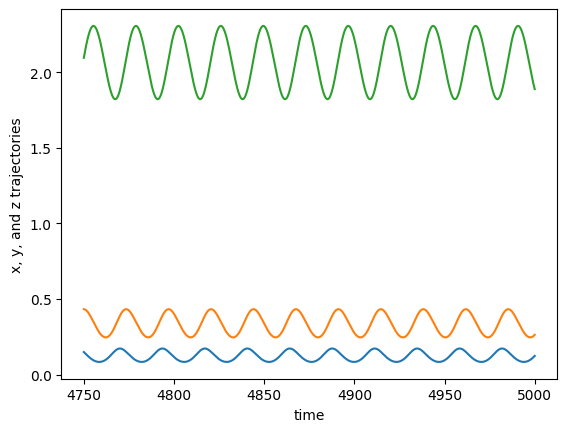

In [4]:
# 2D Plot of the trajectories (X,Y or Z vs T)

# This is used in order to take only a certain portion of the signal: indeed a limit cycle is an asymptotic behavior!
samp_frac= 0.05
lastpart=int(len(tspan)*samp_frac) 


# Please note that the solution is containing both x,y and z. 
sol=odeint(model, X0, tspan)

plt.figure()
# We plot the trajectories for x,y and z, so we iterate over these 3
for i in range(sol.shape[1]):
    # take the last 5% of the signal
    plt.plot(tspan[-lastpart:], sol[-lastpart:,i])

plt.xlabel("time")
plt.ylabel("x, y, and z trajectories")
plt.show()

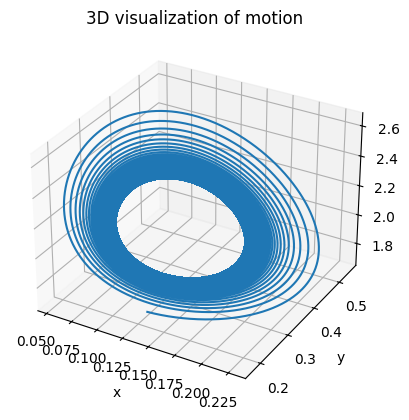

In [5]:
# 3D plot 
ax = plt.axes(projection='3d')
ax.plot(*sol.T)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_title("3D visualization of motion")
plt.show()
plt.close()

5) Use Period_finder on a long (many periods) trajectory on x. 
Comment the period distribution you find and its point estimate.
What happens if you use the y or z trajectory to evaluate the period?

>The Period_finder function takes as an imput the x (or y or z) vector of coordinates and a vector of equally spaced times at wich the given coordinate was obtained with a simulation. 
It takes the x limits of the plot as a possible input, with default values of 0 to 50.
It returns a plot of the period distribution and a point estimate for the period.
If you want to understand how this function was built, read "A. few words on the discrete Fourier transform".

>Hint: to calculate the period, use the last 20 % of the solution 

In [6]:
def Period_finder(x, tspan, xlim=[0,50], ToPrint=True):
    
    signal = x
    
    omega = np.fft.fft(signal)
    
    modes = np.arange(omega.size)
    
    t_dist = (tspan[-1]-tspan[0])
    
    omega_cut = len(omega)//2
    
    modes = modes[1:omega_cut]
    omega = omega[1:omega_cut]
    
    periods = t_dist/modes
    
    abs_o = np.absolute(omega)
    max_o = np.argmax(abs_o)
    
    period_estimate = periods[max_o]
    
    if ToPrint:
        plot_period(period_estimate, periods, abs_o)
        print("the period value is about " + str(round(period_estimate,2)) + " hours")
    
    return (period_estimate, periods, abs_o)

def plot_period(period_estimate, periods, abs_o,xlim=[0,50]):
    fig,ax= plt.subplots()

    ax.axvline(period_estimate, ls='--', c='k')
    
    ax.plot(periods,abs_o/np.sum(abs_o))
    
    ax.set_xlim(xlim)
    ax.set_xlabel("period")
    ax.set_ylabel("propobabilty density")
    
    return (fig ,ax)

the period value is about 23.81 hours


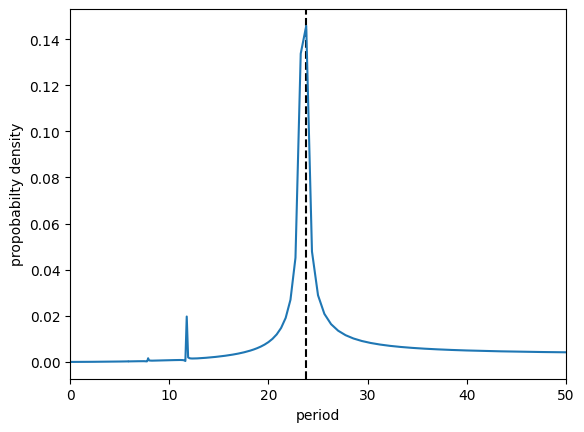

In [7]:
samp_frac=0.2
lastpart=int(len(tspan)*samp_frac) 
_ = Period_finder(sol[-lastpart:,0],tspan[-lastpart:])

>5) If we only consider the peak we find a period of 23.81 hours, which is a reasonable value for a circadian oscillator.

#### Hopf bifurcation.
6) Vary the value of the transcription rate $v_{1}$ in the interval $(0,5]$ $nMh^{-1}$. You can plot some representative trajectories (see the code before and replace the $v_{1}$). Plot and discuss the bifurcation diagram (show $X_{min}$ and $X_{max}$ in function of $v_{1}\in\left(0,5\right]$).

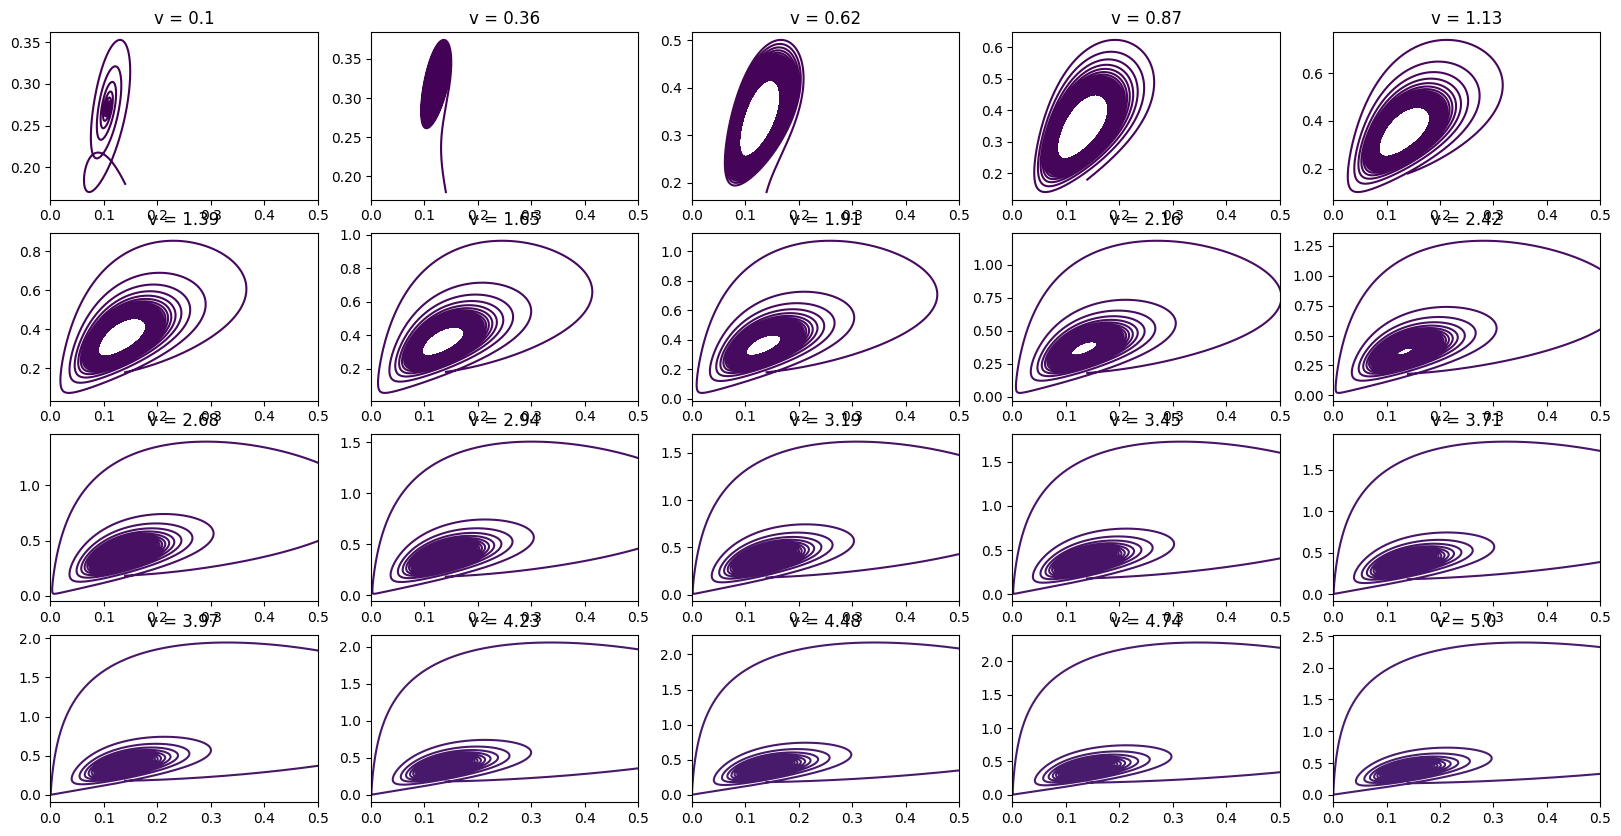

In [8]:
sample_frac=0.05

def model(s, t, v):
    # Parameters
    v1=v
    v2=v4=v6=0.35
    k3=k5=0.7
    # Variable
    x,y,z=s
    # Model
    x_dot=v1*(1/(1+z**4))-v2*(x/(1+x))
    y_dot=k3*x-v4*(y/(1+y))
    z_dot=k5*y-v6*(z/(1+z))
    return x_dot, y_dot, z_dot
    
f, axs = plt.subplots(4,5, figsize=(20,10))
axs=axs.flatten()
cmap = matplotlib.cm.viridis

# We define a range in which we vary v
vspan=np.linspace(0.1,5,20)

lastpart=int(len(tspan)*samp_frac) 

X_lims=[]
for n,v in enumerate(vspan):
    # Initial Conditions
    X0=[0.14,0.18,1.8]
    # Solutions
    sol=odeint(model, X0, tspan, args=(v,))
    # X-Solution
    sol_x=sol[-lastpart:,0]
    # We append the max and the min of the solution according to every different value of v
    X_lims.append([v, np.max(sol_x),np.min(sol_x)])
    
    
    axs[n].plot(sol[:,0],sol[:,1],c=cmap.colors[n])
    axs[n].set_title("v = "+str(round(v,2)))
    axs[n].set_xlim(0,0.8)
    axs[n].set_xlim(0,0.5)
        
    
X_lims=np.array(X_lims)

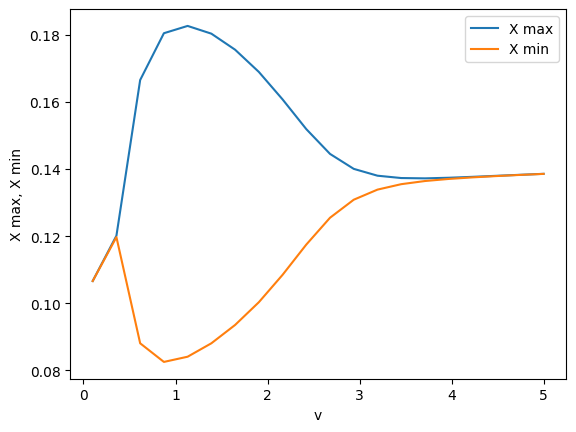

In [9]:
# We plot the minimum and the maximum of the solution according to v
plt.plot(X_lims[:,0], X_lims[:,1], label='X max')
plt.plot(X_lims[:,0], X_lims[:,2], label='X min')
plt.legend()
plt.xlabel("v")
plt.ylabel("X max, X min")
plt.show()

> 6) As we vary v, we see that there is a change in the nature of the fixed point. For low and high values of v, there is NO limit cycle (maximum and minimum of x coincide). In the middle range instead, the maximum of the function is different from the minimum, meaning that a limit cycle is present. 

## 3. Entrainement of a generic non-linear oscillator (Python)

Let's take the model of exercise 2 and add an external periodic entrainement with period $T$ as follows:

\begin{equation}
\frac{dX}{dt} =  v_{1\_ent}(t) * \frac{K_{1}^{4}}{K_{1}^{4} + Z^ {4}} - v_{2} \frac{X}{K_{2} + X}
\end{equation}

\begin{equation}
\frac{dY}{dt} = k_{3}X  - v_{4} \frac{Y}{K_{4} + Y} 
\end{equation}

\begin{equation}
\frac{dZ}{dt} = k_{5}Y  - v_{6} \frac{Z}{K_{6} + Z}  
\end{equation}

where $v_{1\_ent}(t) = v_{1} * A (1 + \sin(\frac{2\pi}{T} t))$

1. Implement the entrainment in the model with $A = 0.01$ and $A = 0.2$. Is the oscilaltor stably entrained? If, what period do you expect then? Verify your prediction by simulation.

>Hint: to calculate the period, use the last 20 % of the solution and to visualise the trajectories, plot only the last 5 % of the solution


In [10]:
T_external = 25
Tmax=T_external * 100
dt=0.01
tspan = np.arange(0, Tmax, dt)
# Initial conditions setting 
X0=[0.14,0.18,1.8]

In [11]:
#Definition of the model with entrainment
def model(s, t, A, T_external=25):
    # Parameters
    v1=0.7
    v2=v4=v6=0.35
    k3=k5=0.7
    # Variables
    x,y,z=s
    # Equations
    v1_entrained = v1 * (1+A*np.sin(2*np.pi*t/T_external))
    x_dot=v1_entrained*(1/(1+z**4))-v2*(x/(1+x))
    y_dot=k3*x-v4*(y/(1+y))
    z_dot=k5*y-v6*(z/(1+z))
    return x_dot, y_dot, z_dot

$A = 0.01$

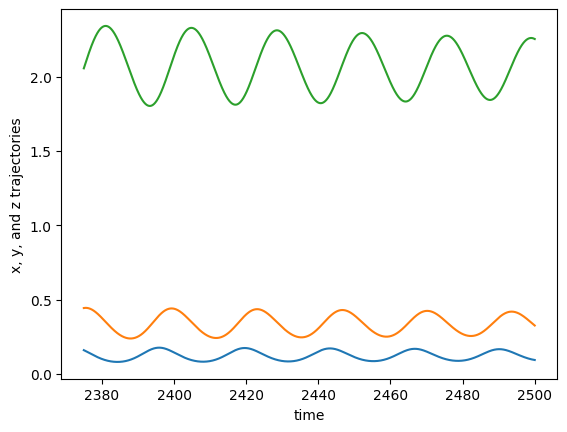

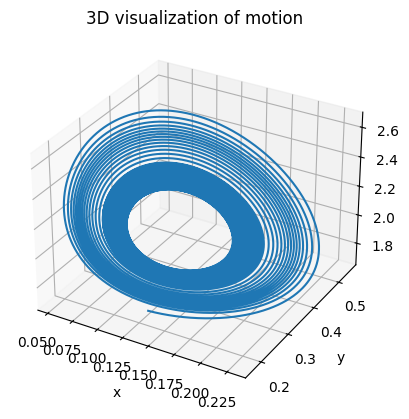

the period value is about 23.81 hours


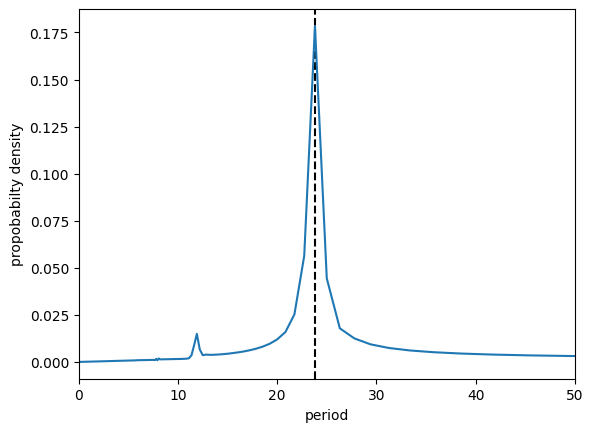

In [12]:
A = 0.01

# Please note that the solution is containing both x,y and z. 
sol=odeint(model, X0, tspan, args=(A,))

# 2D Plot of the trajectories (X,Y or Z vs T)

# This is used in order to take only a certain portion of the signal
samp_frac= 0.05

lastpart=int(len(tspan)*samp_frac) 

plt.figure()

# We plot the trajectories for x,y and z, so we iterate over these 3
for i in range(sol.shape[1]): 
    plt.plot(tspan[-lastpart:], sol[-lastpart:,i])

plt.xlabel("time")
plt.ylabel("x, y, and z trajectories")
plt.show()

# 3D plot 
ax = plt.axes(projection='3d')
ax.plot(*sol.T)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_title("3D visualization of motion")
plt.show()
plt.close()

samp_frac=0.2
_ = Period_finder(sol[-int(Tmax/dt*samp_frac):,0],tspan[-int(Tmax/dt*samp_frac):])

$A = 0.2$

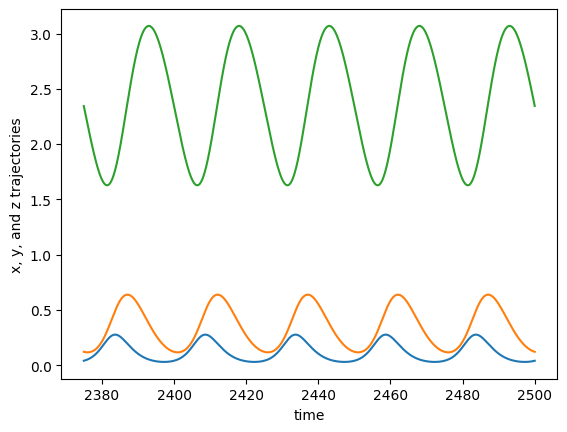

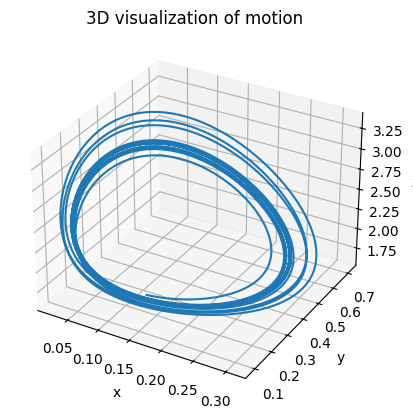

the period value is about 25.0 hours


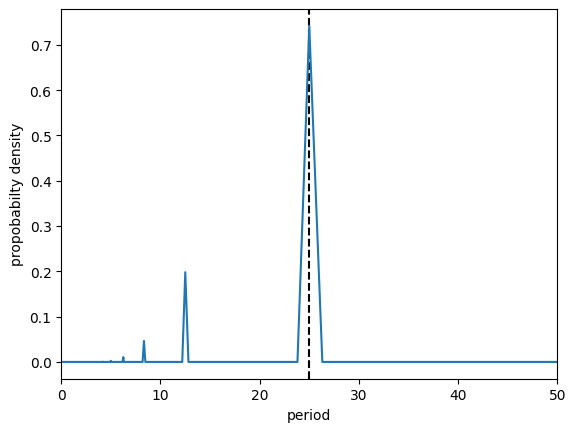

In [13]:
A = 0.2

# Please note that the solution is containing both x,y and z. 
sol=odeint(model, X0, tspan, args=(A,))

# This is used in order to take only a certain portion of the signal
samp_frac= 0.05

lastpart=int(len(tspan)*samp_frac) 

plt.figure()

# We plot the trajectories for x,y and z, so we iterate over these 3
for i in range(sol.shape[1]): 
    plt.plot(tspan[-lastpart:], sol[-lastpart:,i])

plt.xlabel("time")
plt.ylabel("x, y, and z trajectories")
plt.show()

# 3D plot 
ax = plt.axes(projection='3d')
ax.plot(*sol.T)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_title("3D visualization of motion")
plt.show()
plt.close()

samp_frac=0.2
_ = Period_finder(sol[-int(Tmax/dt*samp_frac):,0],tspan[-int(Tmax/dt*samp_frac):])

2. Vary the value of the entrainment strength $A$ in the interval $[0,0.1]$. Which approximative value of A induces a change in period in the model?  You can plot representative trajectories and period diagram using the $period\_finder$ provided function. Discuss your findings.

>Hint: to calculate the period, use the last 20 % of the solution and to visualise the trajectories, plot only the last 5 % of the solution


In [14]:
T_external=25
Tmax = T_external * 100 
dt=0.01
tspan = np.arange(0, Tmax, dt)

# this tspan is used to calculate the period
tspan_20percent = int(0.2*len(tspan))

# this tspan is used for the plotting of the solution
tspan_5percent = int(0.05*len(tspan))

# Initial Conditions
X0=[0.15, 0.3, 1.8]

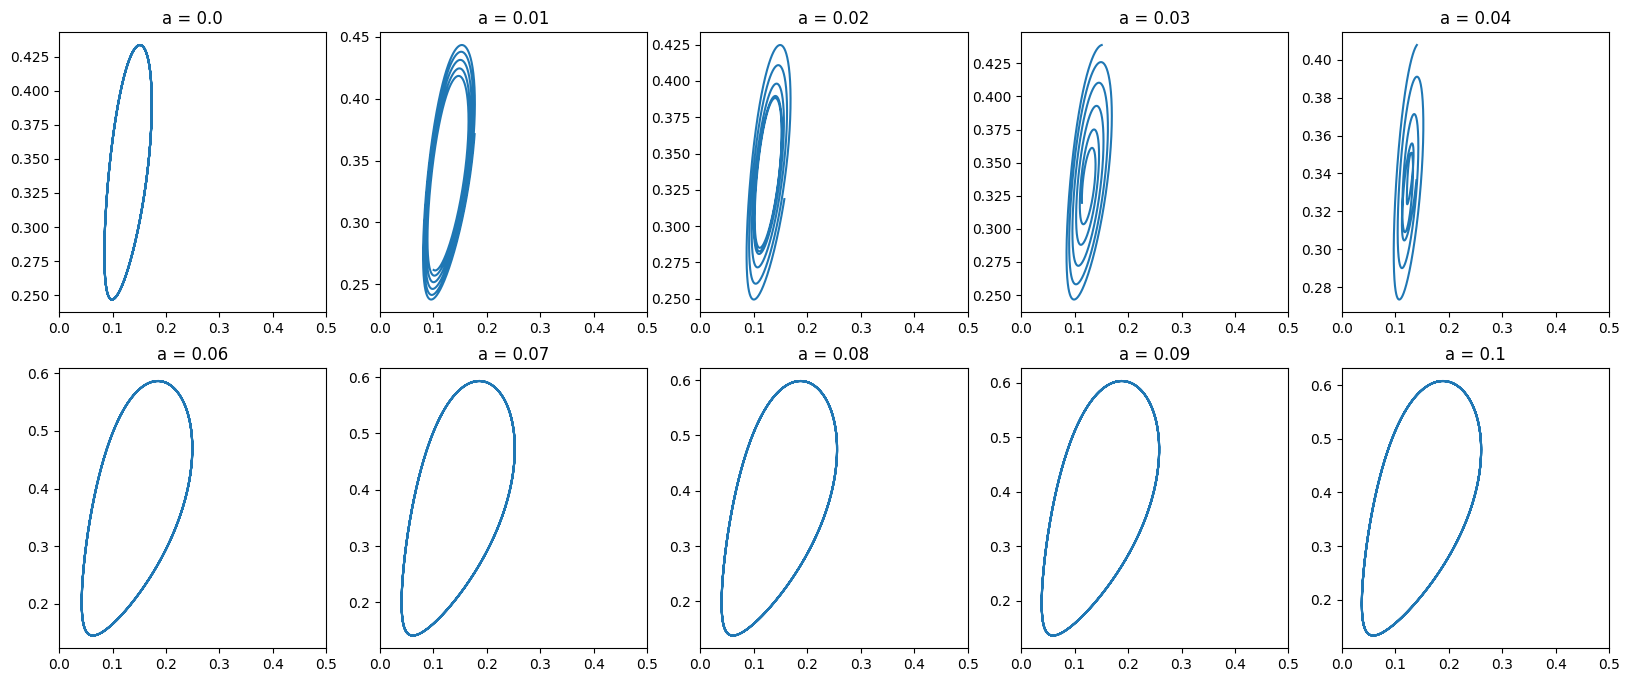

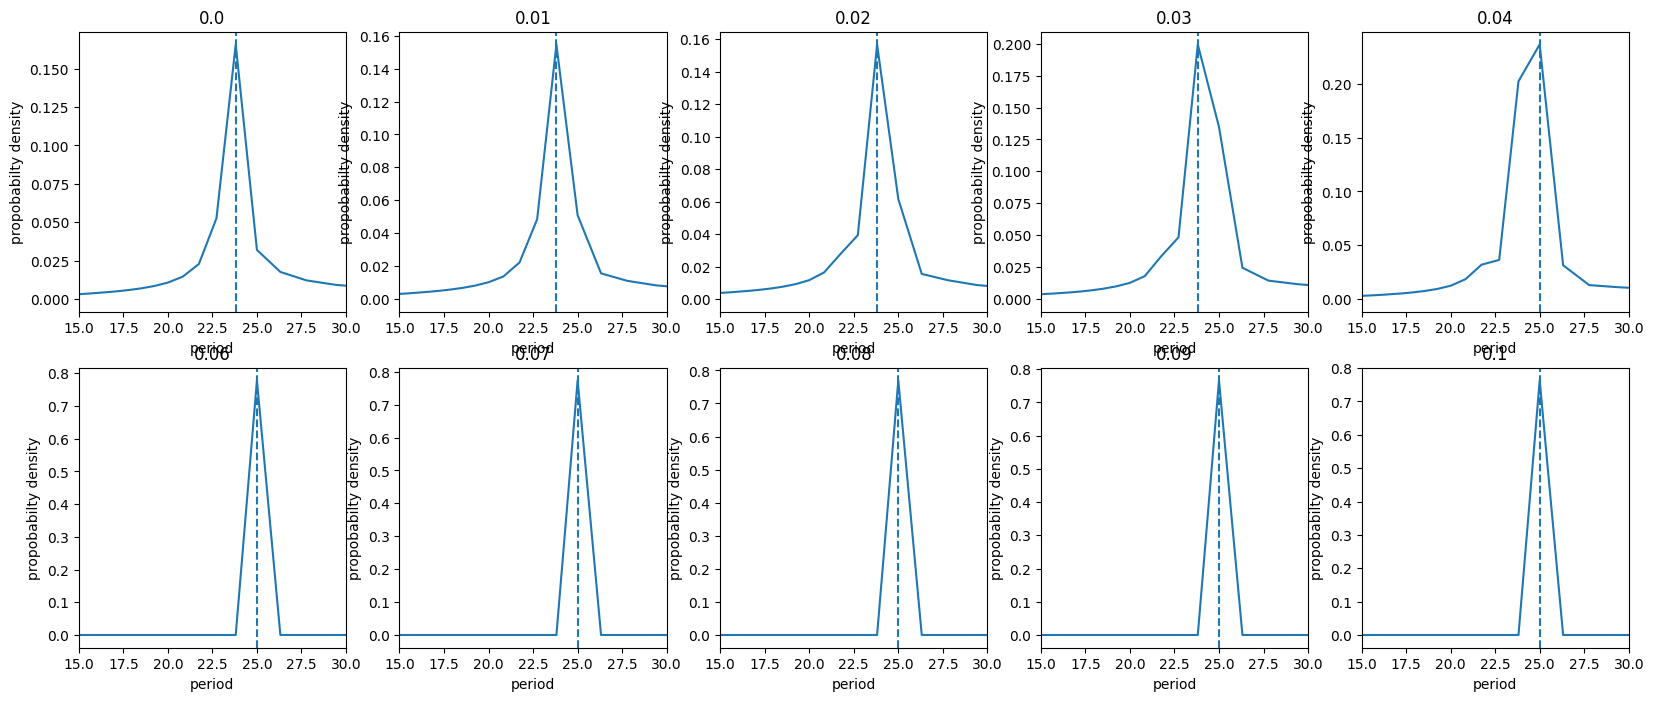

In [15]:
f, axs = plt.subplots(2,5, figsize=(20,8))
axs=axs.flatten()

f2, axs2 = plt.subplots(2,5, figsize=(20,8))
axs2=axs2.flatten()

# We define a range in which we vary A
A=np.linspace(0, 0.1, 10)


for n,a in enumerate(A):

    # Solutions
    sol=odeint(model, X0, tspan, args=(a,))

    axs[n].plot(sol[-tspan_5percent:,0],sol[-tspan_5percent:,1])
    axs[n].set_title("a = "+str(round(a,2)))
    axs[n].set_xlim(0,0.5)

    period_estimate, periods, abs_o = Period_finder(sol[-tspan_20percent:,0], tspan[-tspan_20percent:], ToPrint=False)

    axs2[n].axvline(period_estimate, ls='--')
    axs2[n].plot(periods,abs_o/np.sum(abs_o))
    axs2[n].set_xlim([15,30])
    axs2[n].set_xlabel("period")
    axs2[n].set_ylabel("propobabilty density")
    axs2[n].set_title(str(round(a,2)))


3. To analyse the change of period in relation to the entrainment strength $A$, simulate the model without entrainment for a time $T0$ and then switch on the entrainment. Vary the strength of the entrainment as in 3.2. Discuss the effect of the strength of the entrainment on the period (compare the period before and after switching the entrainment). Discuss you findings.

>Hint: to calculate the period, here use the last 40 % of the solution and to visualise the trajectories, plot only the last 5 % of the solution

In [16]:
T_external=25

# Total time of the simulation of the model
Tmax = T_external * 1000 #here we simulate a total of 100 cycles, you can also change this value
dt=0.01

# Time after the entrainment should start
T0 = T_external * 40
n_entrain= int(T0 / dt)

# Initial Conditions
X0=[0.15, 0.3, 1.8]

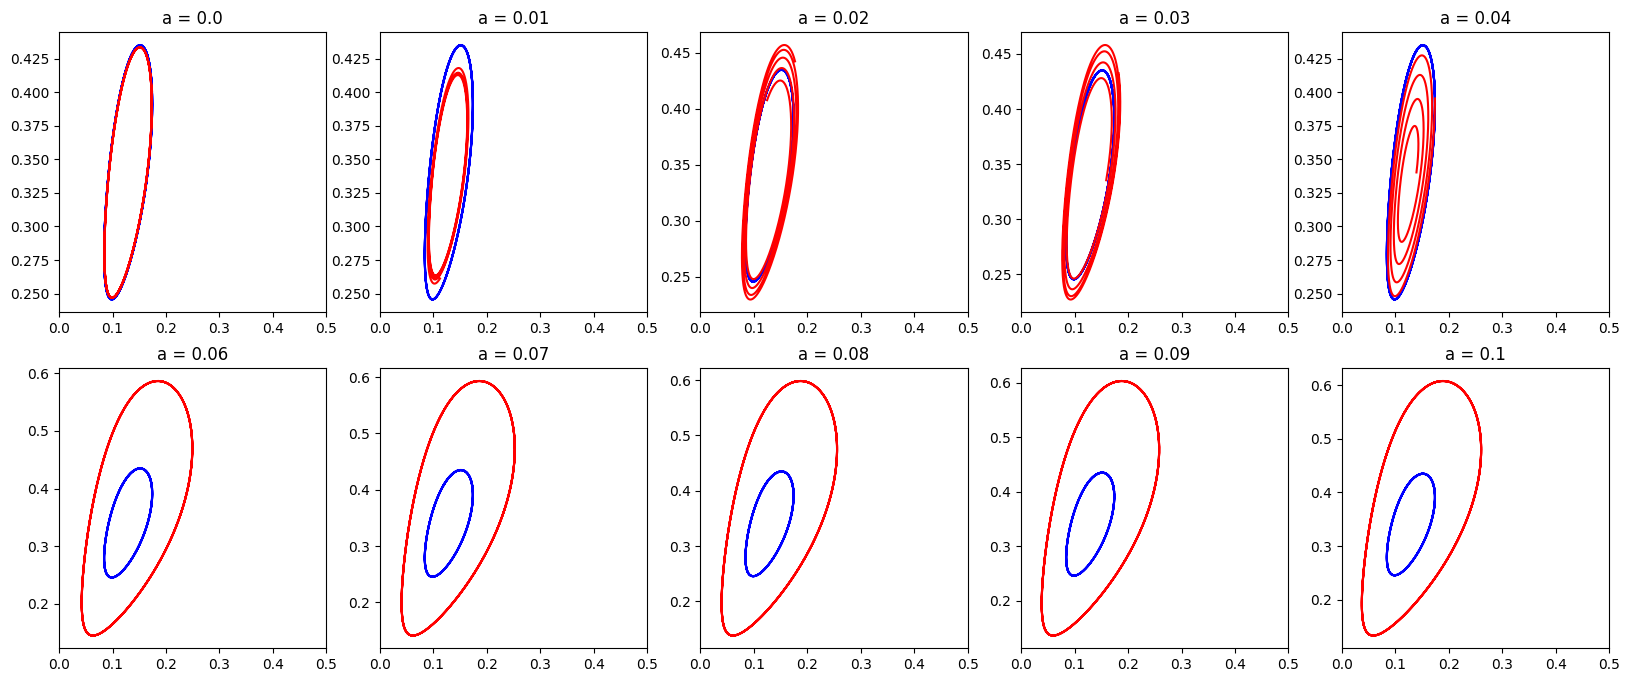

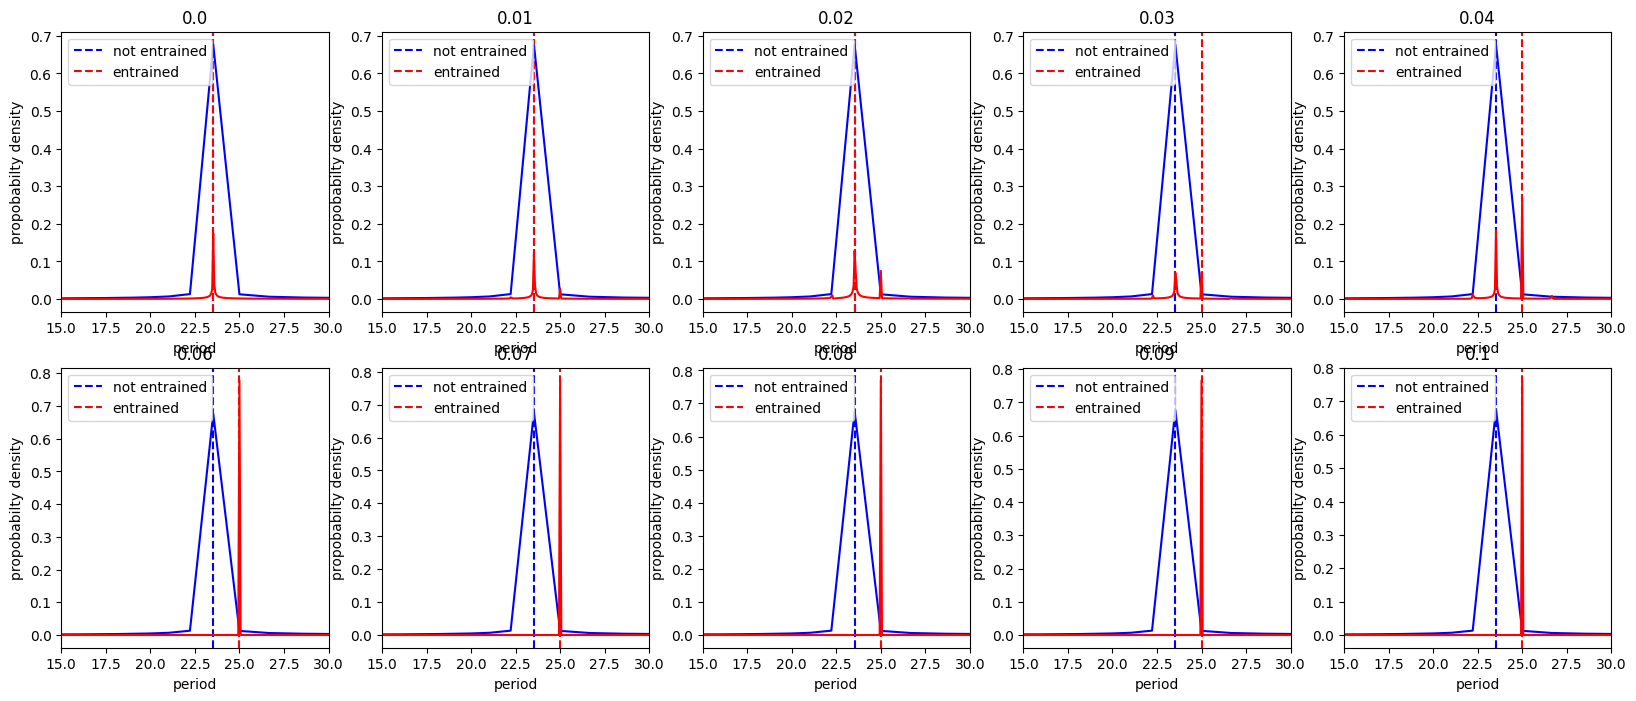

In [17]:
f, axs = plt.subplots(2,5, figsize=(20,8))
axs=axs.flatten()

f2, axs2 = plt.subplots(2,5, figsize=(20,8))
axs2=axs2.flatten()

# We define a range in which we vary A
A=np.linspace(0, 0.1, 10)

tspan = np.arange(0, Tmax, dt)
tspan_1 = tspan[:n_entrain]
tspan_2 = tspan[n_entrain:]

# these tspan are used to calculate the period
# we skip the first oscillations of the system to calculate the period
tspan1_40percent = int(0.4*len(tspan_1))
tspan2_40percent = int(0.4*len(tspan_2))

for n,a in enumerate(A):
    
    # Initial Conditions
    X0=[0.15, 0.3, 1.8]

    # Solutions
    a1=0.0
    sol1=odeint(model, X0, tspan_1, args=(a1,))

    X0=sol1[-1,:]
    sol2=odeint(model, X0, tspan_2, args=(a,))
    
    axs[n].plot(sol1[-10000:,0],sol1[-10000:,1],c='b')
    axs[n].plot(sol2[-10000:,0],sol2[-10000:,1],c='r')
    axs[n].set_title("a = "+str(round(a,2)))
    axs[n].set_xlim(0,0.5)

    period_estimate1, periods1, abs_o1 = Period_finder(sol1[-tspan1_40percent:,0], tspan_1[-tspan1_40percent:], ToPrint=False)
    period_estimate2, periods2, abs_o2 = Period_finder(sol2[-tspan2_40percent:,0], tspan_2[-tspan2_40percent:], ToPrint=False)

    axs2[n].axvline(period_estimate1, ls='--', c='b', label="not entrained")
    axs2[n].axvline(period_estimate2, ls='--', c='r', label="entrained")
    axs2[n].plot(periods1,abs_o1/np.sum(abs_o1), c='b')
    axs2[n].plot(periods2,abs_o2/np.sum(abs_o2), c='r')
    axs2[n].set_xlim([15,30])
    axs2[n].set_xlabel("period")
    axs2[n].set_ylabel("propobabilty density")
    axs2[n].set_title(str(round(a,2)))
    axs2[n].legend(loc="upper left")
